In [31]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [32]:
y   = load('../../March2021/Observation_models/ObsY.joblib')
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
histEns = load ('FF_historical_ensembleMean_Best5.joblib')

In [33]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.2190222


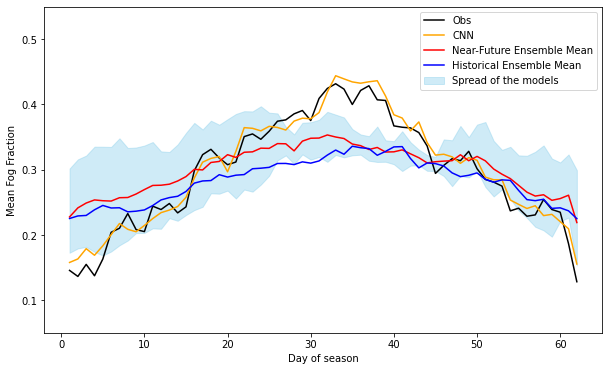

In [34]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
TabList=[]
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
TabList.append(OTs)

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp126/Modelplots_future/'+cL+'_ssp126.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2065-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
TabList.append(meanMS)
minMS=np.amin(MS,axis=0)
TabList.append(minMS)
maxMS=np.amax(MS,axis=0)
TabList.append(maxMS)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Near-Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_126_2015-2065.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()

#print('\n'.join(map(str, meanMS))) 


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.24092202


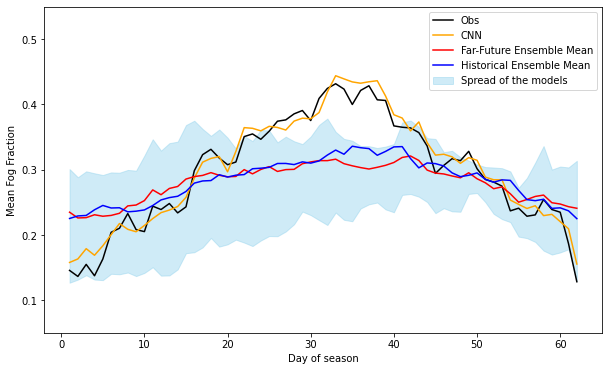

In [35]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp126/Modelplots_future/'+cL+'_ssp126.joblib')
    fL1=fL.sel(time=slice('2066-1-1','2100-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Far-Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_126_2066-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()
#print('\n'.join(map(str, meanMS))) 

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.2722498


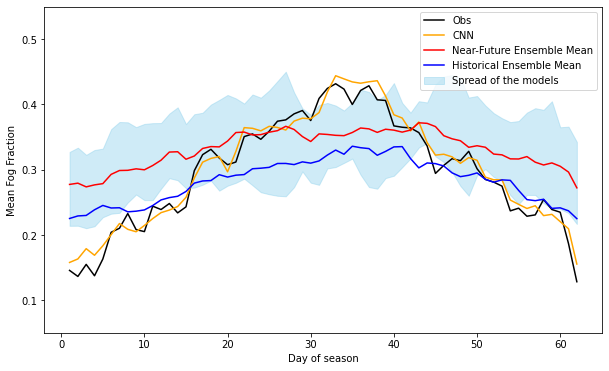

In [36]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp245/Modelplots_future/'+cL+'_ssp245.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2065-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Near-Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')
plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_245_2015-2065.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()

#print('\n'.join(map(str, meanMS))) 

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.29315796


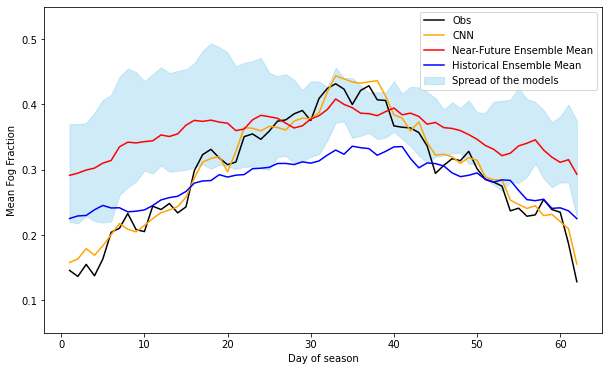

In [37]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp370/Modelplots_future/'+cL+'_ssp370.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2065-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Near-Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_370_2015-2065.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()
#print('\n'.join(map(str, meanMS))) 

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.26032966


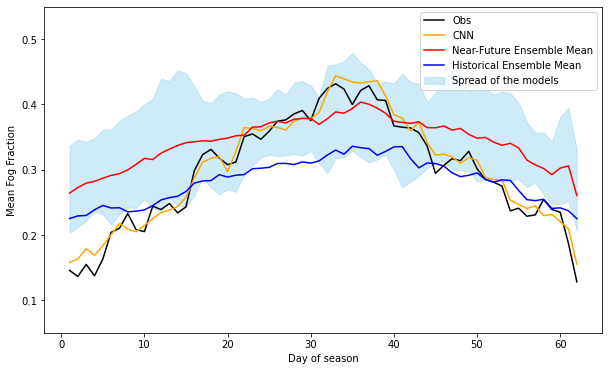

In [38]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp585/Modelplots_future/'+cL+'_ssp585.joblib')
    fL1=fL.sel(time=slice('2015-1-1','2065-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Near-Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_585_2015-2065.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()
#print('\n'.join(map(str, meanMS)))

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.22112699


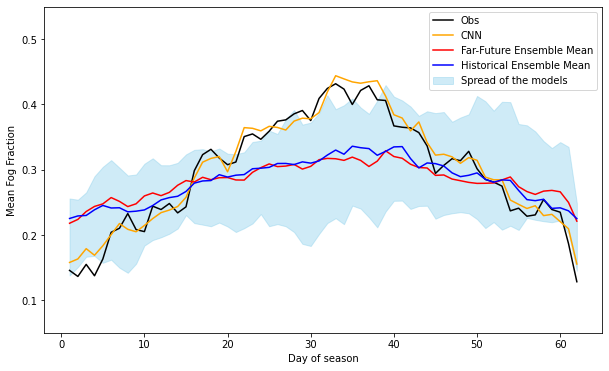

In [39]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp245/Modelplots_future/'+cL+'_ssp245.joblib')
    fL1=fL.sel(time=slice('2066-1-1','2100-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Far-Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_245_2066-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()
#print('\n'.join(map(str, meanMS)))
#print('\n'.join(map(str, CNNTs.values)))

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.30174056


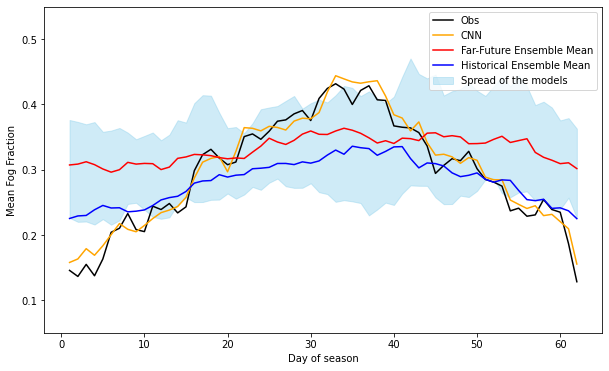

In [40]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp370/Modelplots_future/'+cL+'_ssp370.joblib')
    fL1=fL.sel(time=slice('2066-1-1','2100-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Far-Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')
plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_370_2066-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()
#print('\n'.join(map(str, meanMS)))

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

ACCESS-CM2
IITM-ESM
IPSL-CM6A-LR
MPI-ESM1-2-LR
EC-Earth3
0.28399354


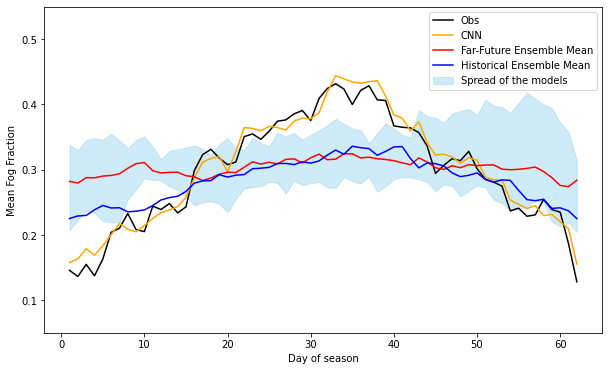

In [41]:
#fig = plt.figure(figsize=(20,10))
fig = plt.figure(figsize=(10,6))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

classes = ['ACCESS-CM2','IITM-ESM','IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3']
class_colours = ['red','chocolate','lime','plum','grey']

# Obs
ts1=getSeasonalCycle(y)
    
ts2=ts1.roll(dayofyear=31)
ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    #print(xr.corr(ts, OTs))
    

    #fMean.append((ts))
#plt.plot(x,ts,label='obs', color='black')

for ( cL, cO) in zip(classes,class_colours):
    fL=load('../../April2021/New_ssp585/Modelplots_future/'+cL+'_ssp585.joblib')
    fL1=fL.sel(time=slice('2066-1-1','2100-12-31'))
    ts1=getSeasonalCycle(fL1)
    print(cL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    #print(xr.corr(ts, OTs))
    fCC.append(xr.corr(ts, OTs))
    #fMean.append((ts))
    

MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

plt.fill_between(x, maxMS,minMS,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs,label='Obs', color='black')
plt.plot(x,CNNTs,label='CNN', color='orange')
plt.plot(x,meanMS,label='Far-Future Ensemble Mean', color='red')
plt.plot(x,histEns,label='Historical Ensemble Mean', color='blue')

plt.ylim([0.05, 0.55])
    
plt.xlabel('Day of season')
plt.ylabel('Mean Fog Fraction')     
plt.legend()    
plt.savefig('FF_SC_585_2066-2100.eps')
#plt.savefig('FogFraction_SC_legend.eps')
plt.show()
##plt.legend()
#print('\n'.join(map(str, meanMS)))